In [160]:
import pandas as pd
import matplotlib.pylab as plt
from pathlib import Path

In [161]:
# Set filepath
root = Path(r'~/PycharmProjects/avalanche_ml/').expanduser()
report_dir = root / 'reports'
f1_file = root / 'output/_sk-classifier_f1.csv'
pred_file = root / 'output/_sk-classifier_pred.csv'
importances_file = root / 'output/_sk-classifier_importances.csv'
prefix = f1_file.stem

In [162]:
def rm_bad_char(s: str):
    # initializing bad_chars_list
    bad_chars = [';', ':', '!', "*", "?", "."]
    if any(bc in s for bc in bad_chars):
        for bc in bad_chars:
            s = s.replace(bc, '_')
        return s
    else:
        return s

# Test it
a = 'un:done_!'
s = rm_bad_char(a)
print(s)

un_done__


In [163]:
# Read F1 score file
f1_df = pd.read_csv(f1_file, sep=';', header=[0], index_col=[0, 1, 2, 3])
f1_df.head()

f1  precision    recall  rmse   0
          attribute         label                                             
CLASS NaN danger_level      1          0.820788   0.831254  0.810717   NaN NaN
                            2          0.811196   0.793988  0.829461   NaN NaN
                            3          0.676428   0.697061  0.658017   NaN NaN
                            4          0.373360   0.441314  0.324734   NaN NaN
          emergency_warning Ikke gitt  0.951033   0.926102  0.977409   NaN NaN

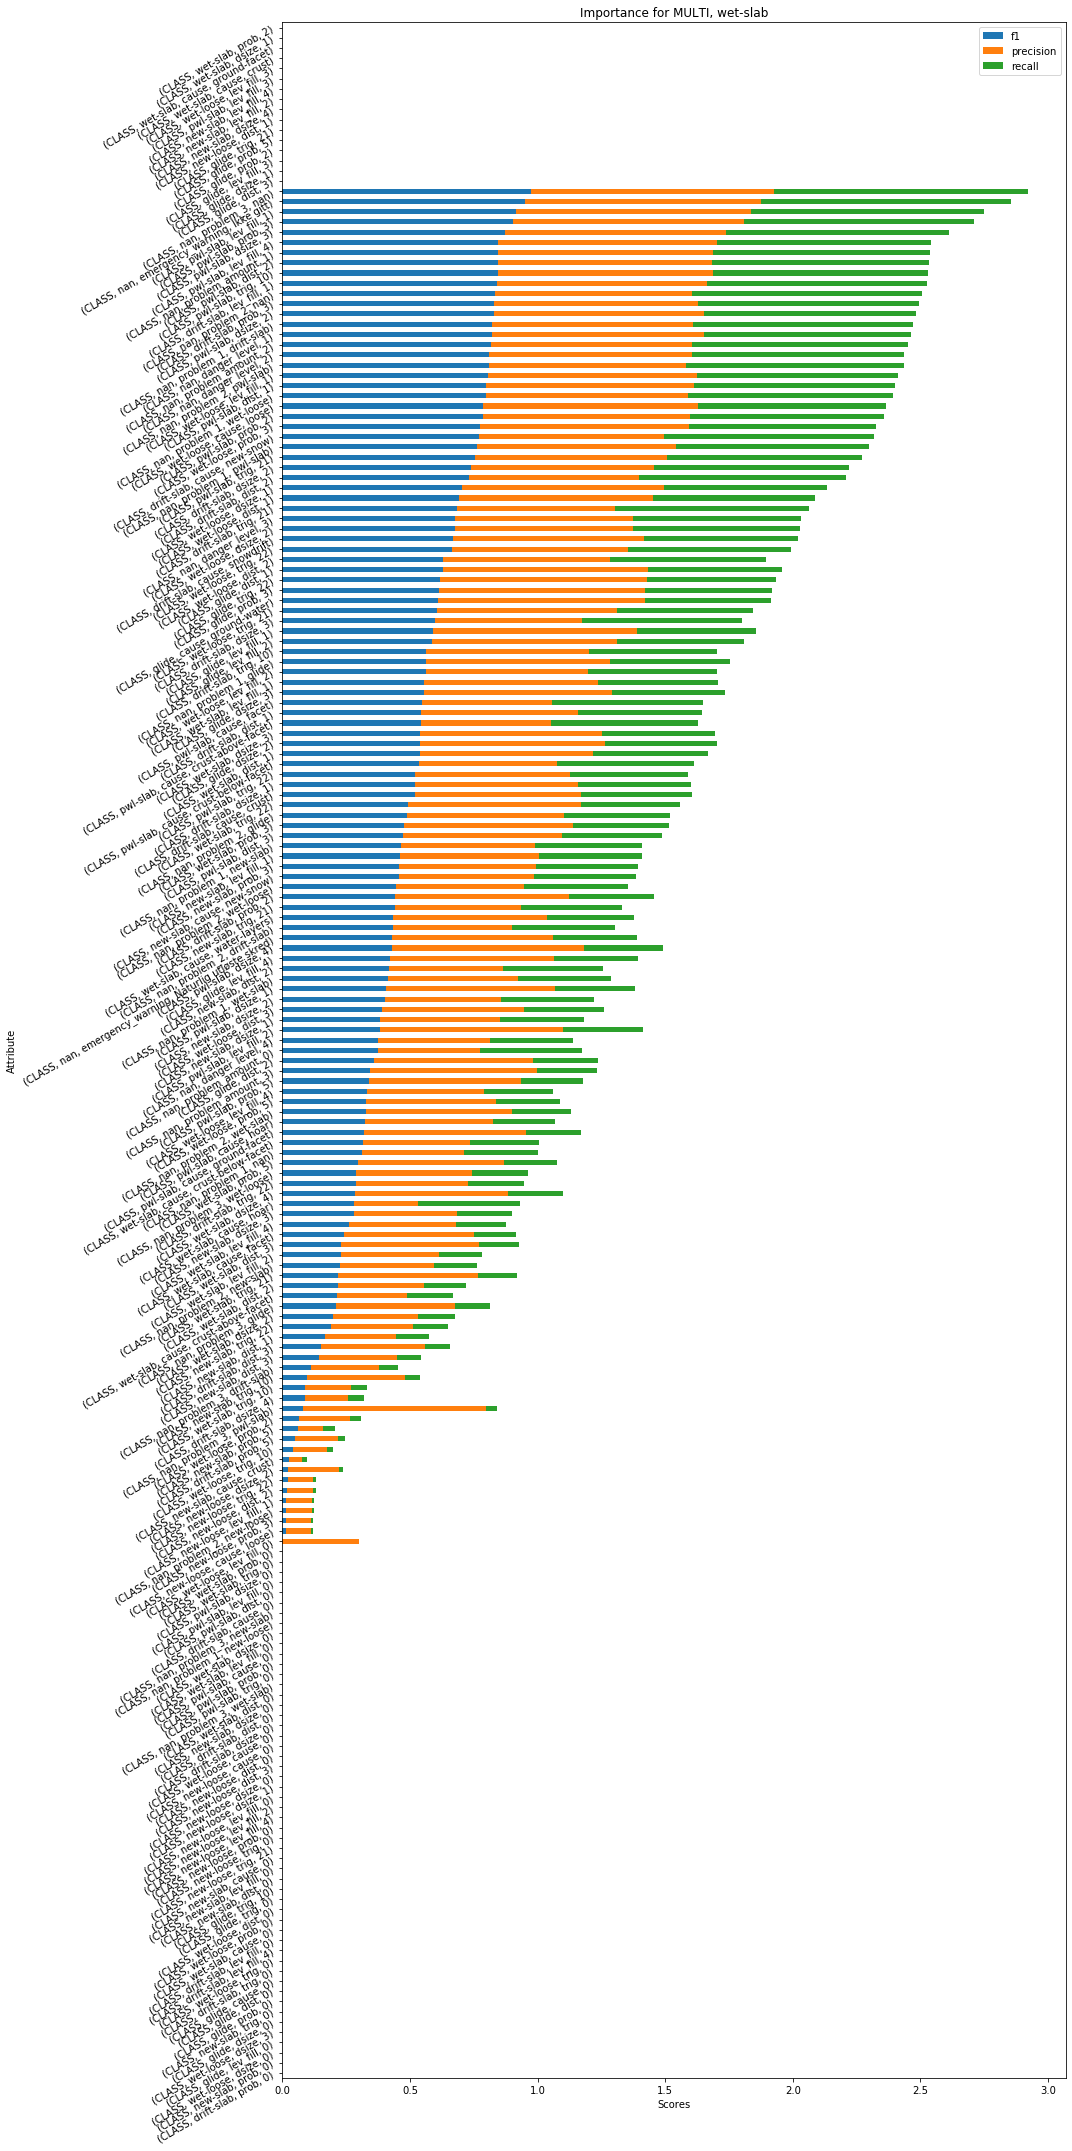

In [164]:
_f1_df = f1_df.drop(['REAL', 'MULTI']).sort_values(by='f1', axis='index')
_ax1 = _f1_df[['f1', 'precision', 'recall']].plot(kind='barh', stacked=True, figsize=(15, 30))
_ax1.set(xlabel = 'Scores',
         ylabel = 'Attribute',
         title = 'Importance for {0}, {1}'.format(c[0], c[1]))
plt.yticks(rotation=30)
plt.tight_layout()
plt.savefig('{0}_scores.pdf'.format(prefix))

In [165]:
# Read importance file
importances_df = pd.read_csv(importances_file, sep=';', header=[0, 1], index_col=[0, 1])
importances_df.head()

CLASS                                      \
                   Unnamed: 2_level_1 drift-slab glide new-loose new-slab   
feature_name   day                                                          
region_id_3001 0                  0.0        0.0   0.0       0.0      0.0   
region_id_3002 0                  0.0        0.0   0.0       0.0      0.0   
region_id_3003 0                  0.0        0.0   0.0       0.0      0.0   
region_id_3004 0                  0.0        0.0   0.0       0.0      0.0   
region_id_3005 0                  0.0        0.0   0.0       0.0      0.0   

                                                     MULTI                  \
                    pwl-slab wet-loose wet-slab drift-slab glide new-loose   
feature_name   day                                                           
region_id_3001 0    0.000000       0.0      0.0        0.0   0.0       0.0   
region_id_3002 0    0.000000       0.0      0.0        0.0   0.0       0.0   
region_id_3003 0    0.001267       0.0      0.0        0.0   0.0       0.0   
region_id_3004 0    0.000000       0.0      0.0        0.0   0.0       0.0   
region_id_3005 0    0.000000       0.0      0.0        0.0   0.0       0.0   

                                                         
                   new-slab pwl-slab wet-loose wet-slab  
feature_name   day                                       
region_id_3001 0        0.0      0.0       0.0      0.0  
region_id_3002 0        0.0      0.0       0.0      0.0  
region_id_3003 0        0.0      0.0       0.0      0.0  
region_id_3004 0        0.0      0.0       0.0      0.0  
region_id_3005 0        0.0      0.0       0.0      0.0

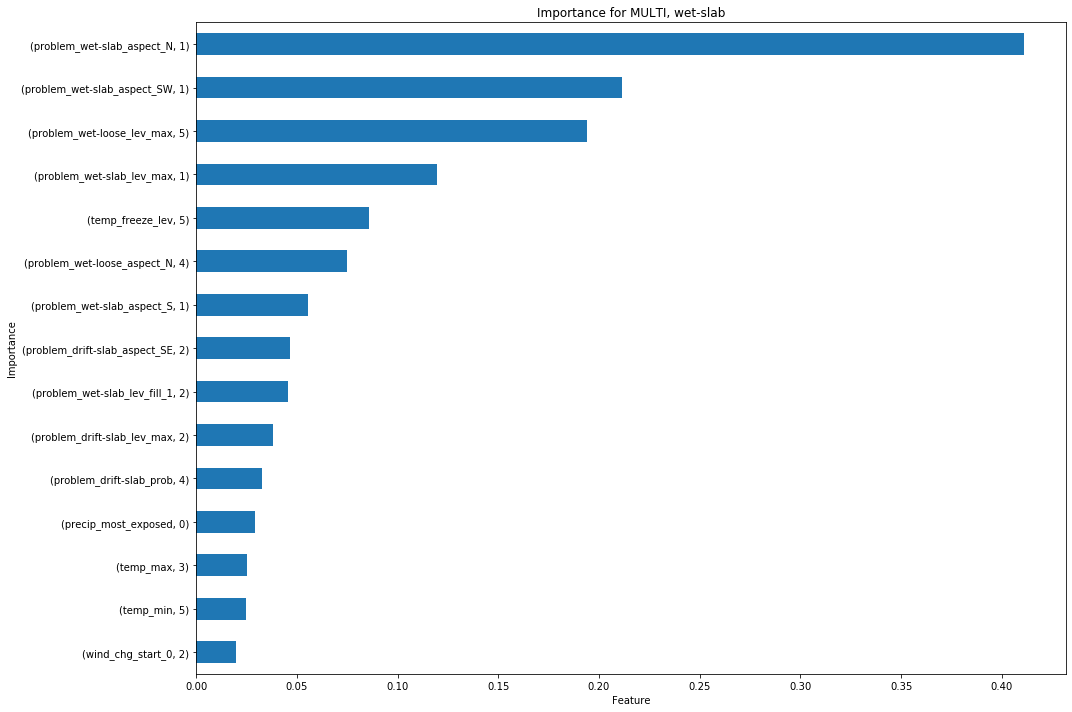

In [166]:
for c in importances_df.columns:
    _df = importances_df.nlargest(15, c, keep='all')
    _ax2 = _df[c].sort_values().plot(kind='barh', figsize=(15, 10))
    _ax2.set(xlabel = 'Feature',
             ylabel = 'Importance',
             title = 'Importance for {0}, {1}'.format(c[0], c[1]))
    plt.tight_layout()
    plt.savefig('{2}_importance_{0}_{1}.pdf'.format(c[0], rm_bad_char(c[1]), prefix))

In [169]:
# TODO: stitch together PDFs
print(root)
files = [e for e in report_dir.iterdir() if (e.is_file and e.suffix == '.pdf' and e.stem)]
print(files)

C:\Users\kmu\PycharmProjects\avalanche_ml
[WindowsPath('C:/Users/kmu/PycharmProjects/avalanche_ml/reports/_sk-classifier_f1_importance_CLASS_drift-slab.pdf'), WindowsPath('C:/Users/kmu/PycharmProjects/avalanche_ml/reports/_sk-classifier_f1_importance_CLASS_glide.pdf'), WindowsPath('C:/Users/kmu/PycharmProjects/avalanche_ml/reports/_sk-classifier_f1_importance_CLASS_new-loose.pdf'), WindowsPath('C:/Users/kmu/PycharmProjects/avalanche_ml/reports/_sk-classifier_f1_importance_CLASS_new-slab.pdf'), WindowsPath('C:/Users/kmu/PycharmProjects/avalanche_ml/reports/_sk-classifier_f1_importance_CLASS_pwl-slab.pdf'), WindowsPath('C:/Users/kmu/PycharmProjects/avalanche_ml/reports/_sk-classifier_f1_importance_CLASS_Unnamed_ 2_level_1.pdf'), WindowsPath('C:/Users/kmu/PycharmProjects/avalanche_ml/reports/_sk-classifier_f1_importance_CLASS_wet-loose.pdf'), WindowsPath('C:/Users/kmu/PycharmProjects/avalanche_ml/reports/_sk-classifier_f1_importance_CLASS_wet-slab.pdf'), WindowsPath('C:/Users/kmu/PycharmP

In [173]:
from glob import glob
a = glob(str(report_dir / '{0}*.pdf'.format(prefix)))

['C:\\Users\\kmu\\PycharmProjects\\avalanche_ml\\reports\\_sk-classifier_f1_importance_CLASS_drift-slab.pdf', 'C:\\Users\\kmu\\PycharmProjects\\avalanche_ml\\reports\\_sk-classifier_f1_importance_CLASS_glide.pdf', 'C:\\Users\\kmu\\PycharmProjects\\avalanche_ml\\reports\\_sk-classifier_f1_importance_CLASS_new-loose.pdf', 'C:\\Users\\kmu\\PycharmProjects\\avalanche_ml\\reports\\_sk-classifier_f1_importance_CLASS_new-slab.pdf', 'C:\\Users\\kmu\\PycharmProjects\\avalanche_ml\\reports\\_sk-classifier_f1_importance_CLASS_pwl-slab.pdf', 'C:\\Users\\kmu\\PycharmProjects\\avalanche_ml\\reports\\_sk-classifier_f1_importance_CLASS_Unnamed_ 2_level_1.pdf', 'C:\\Users\\kmu\\PycharmProjects\\avalanche_ml\\reports\\_sk-classifier_f1_importance_CLASS_wet-loose.pdf', 'C:\\Users\\kmu\\PycharmProjects\\avalanche_ml\\reports\\_sk-classifier_f1_importance_CLASS_wet-slab.pdf', 'C:\\Users\\kmu\\PycharmProjects\\avalanche_ml\\reports\\_sk-classifier_f1_importance_MULTI_drift-slab.pdf', 'C:\\Users\\kmu\\Pychar

In [ ]:
# Stitch together one PDF report

from PyPDF2 import PdfFileMerger

pdfs = ['file1.pdf', 'file2.pdf', 'file3.pdf', 'file4.pdf']

merger = PdfFileMerger()

for pdf in pdfs:
    merger.append(pdf)

merger.write("result.pdf")
merger.close()

In [140]:

Path.home()

WindowsPath('C:/Users/kmu')